In [1]:
import polars as pl

In [2]:
df = pl.read_csv("/home/jens-peter-joost/Coding/cvrp_solver_comparison/data/benchmark_vroom.csv")

In [3]:
df.filter((pl.col("Solver") == "pyvrp") & (pl.col("Solution Quality") >= 1.0)).select("Solution Quality").mean()


Solution Quality
f64
1.004079


In [4]:
df.filter((pl.col("Solver") == "ortools") & (pl.col("Solution Quality") >= 1.0)).select("Solution Quality").mean()

Solution Quality
f64
1.073701


In [5]:
df.filter((pl.col("Solver") == "rustvrp") & (pl.col("Solution Quality") >= 1.0)).select("Solution Quality").mean()

Solution Quality
f64
1.047138


In [6]:
df.filter((pl.col("Solver") == "pyhygese") & (pl.col("Solution Quality") >= 1.0)).select("Solution Quality").mean()

Solution Quality
f64
1.007386


In [7]:
print(df)

shape: (305, 6)
┌────────────┬──────┬────────────────┬─────────────────┬──────────┬──────────────────┐
│ Instance   ┆ Size ┆ Time Limit (s) ┆ Actual Time (s) ┆ Solver   ┆ Solution Quality │
│ ---        ┆ ---  ┆ ---            ┆ ---             ┆ ---      ┆ ---              │
│ str        ┆ i64  ┆ i64            ┆ f64             ┆ str      ┆ f64              │
╞════════════╪══════╪════════════════╪═════════════════╪══════════╪══════════════════╡
│ X-n548-k50 ┆ 548  ┆ 1              ┆ 194.147626      ┆ vroom    ┆ 1.009504         │
│ X-n548-k50 ┆ 548  ┆ 194            ┆ 194.687957      ┆ pyvrp    ┆ 1.002699         │
│ X-n548-k50 ┆ 548  ┆ 194            ┆ 194.447504      ┆ rustvrp  ┆ 1.013622         │
│ X-n548-k50 ┆ 548  ┆ 194            ┆ 194.01753       ┆ ortools  ┆ 1.031465         │
│ X-n548-k50 ┆ 548  ┆ 194            ┆ 194.08995       ┆ pyhygese ┆ 1.008754         │
│ …          ┆ …    ┆ …              ┆ …               ┆ …        ┆ …                │
│ X-n110-k13 ┆ 110  ┆ 1    

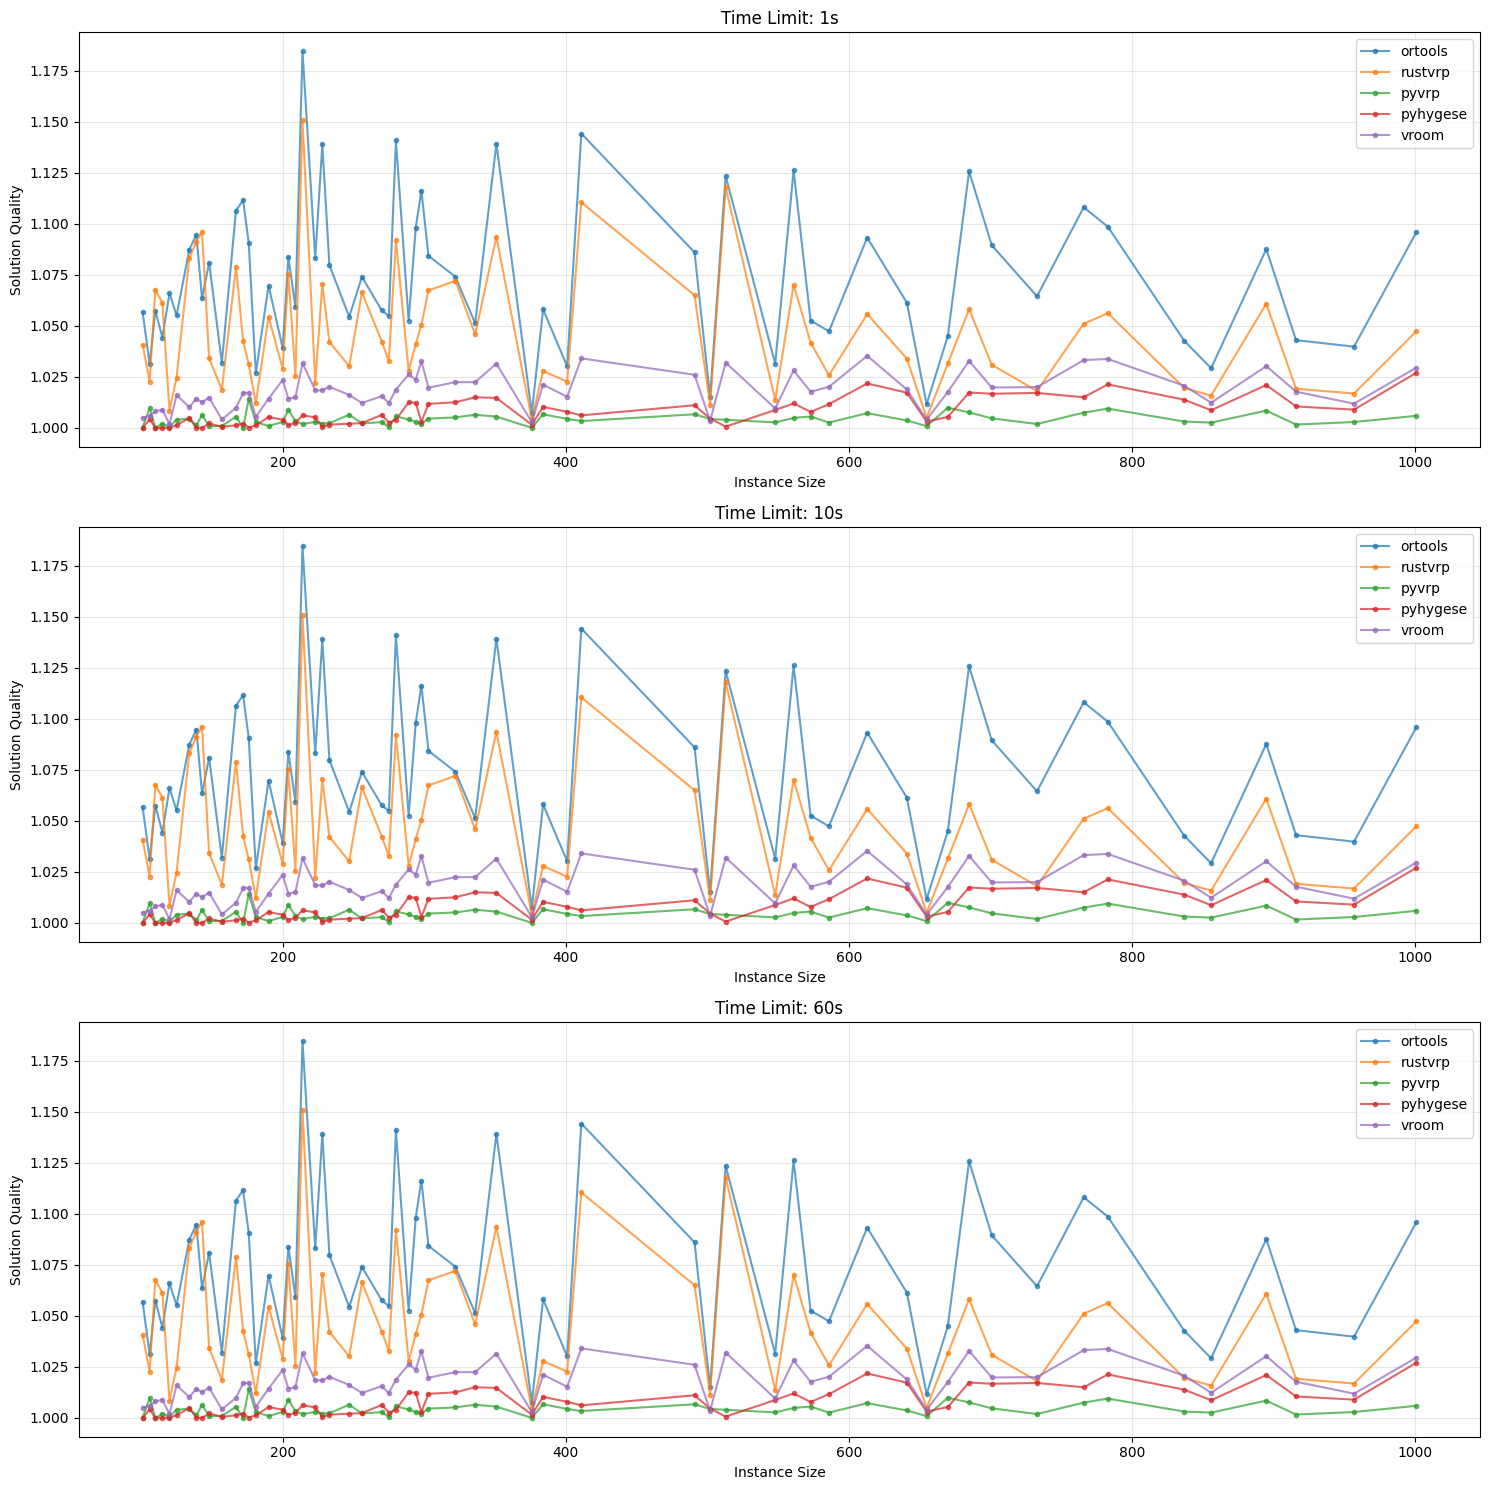

In [9]:
import matplotlib.pyplot as plt

# Create three plots for time limits 1s, 10s, and 60s
time_limits = [1, 10, 60]
solvers = df.select("Solver").unique().to_series().to_list()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for idx, time_limit in enumerate(time_limits):
    ax = axes[idx]
    
    # Filter data for this time limit
    # df_filtered = df.filter(pl.col("Time Limit (s)") == time_limit)
    df_filtered = df
    
    for solver in solvers:
        # Get data for this solver, sorted by size
        solver_data = df_filtered.filter((pl.col("Solver") == solver) & (pl.col("Solution Quality") >= 1)).sort("Size")
        
        sizes = solver_data.select("Size").to_series().to_list()
        qualities = solver_data.select("Solution Quality").to_series().to_list()
        
        ax.plot(sizes, qualities, marker='o', label=solver, markersize=3, alpha=0.7)
    
    ax.set_xlabel("Instance Size")
    ax.set_ylabel("Solution Quality")
    ax.set_title(f"Time Limit: {time_limit}s")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Solver, Time Limit, Instances solved, Quality Aware

In [34]:
summary1 = df.filter(pl.col("Solution Quality") >= 1.0).group_by(["Solver", "Time Limit (s)"
]).agg(pl.col("Instance").count(), pl.col("Solution Quality").mean()).sort(["Time Limit (s)", "Solver"]).rename({"Instance": "#solved"})

In [35]:
summary1

Solver,Time Limit (s),#solved,Solution Quality
str,i64,u32,f64
"""ortools""",1,81,1.162819
"""pyhygese""",1,98,1.02732
"""pyvrp""",1,100,1.045563
"""rustvrp""",1,83,1.15576
"""ortools""",10,100,1.094578
…,…,…,…
"""rustvrp""",10,100,1.085975
"""ortools""",60,100,1.073797
"""pyhygese""",60,100,1.012069


In [36]:
summary1[:]

Solver,Time Limit (s),#solved,Solution Quality
str,i64,u32,f64
"""ortools""",1,81,1.162819
"""pyhygese""",1,98,1.02732
"""pyvrp""",1,100,1.045563
"""rustvrp""",1,83,1.15576
"""ortools""",10,100,1.094578
…,…,…,…
"""rustvrp""",10,100,1.085975
"""ortools""",60,100,1.073797
"""pyhygese""",60,100,1.012069


In [37]:
with pl.Config(tbl_rows=100):
    print(summary1)

shape: (12, 4)
┌──────────┬────────────────┬─────────┬──────────────────┐
│ Solver   ┆ Time Limit (s) ┆ #solved ┆ Solution Quality │
│ ---      ┆ ---            ┆ ---     ┆ ---              │
│ str      ┆ i64            ┆ u32     ┆ f64              │
╞══════════╪════════════════╪═════════╪══════════════════╡
│ ortools  ┆ 1              ┆ 81      ┆ 1.162819         │
│ pyhygese ┆ 1              ┆ 98      ┆ 1.02732          │
│ pyvrp    ┆ 1              ┆ 100     ┆ 1.045563         │
│ rustvrp  ┆ 1              ┆ 83      ┆ 1.15576          │
│ ortools  ┆ 10             ┆ 100     ┆ 1.094578         │
│ pyhygese ┆ 10             ┆ 98      ┆ 1.01774          │
│ pyvrp    ┆ 10             ┆ 100     ┆ 1.018332         │
│ rustvrp  ┆ 10             ┆ 100     ┆ 1.085975         │
│ ortools  ┆ 60             ┆ 100     ┆ 1.073797         │
│ pyhygese ┆ 60             ┆ 100     ┆ 1.012069         │
│ pyvrp    ┆ 60             ┆ 100     ┆ 1.006713         │
│ rustvrp  ┆ 60             ┆ 100     ┆ 1